In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("pronostico_dataset.csv", sep=";")

In [3]:
data


,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [4]:
data['age']=data['age'].astype(int)

In [5]:
data

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77,85.288742,80.021878,79.957109,retinopathy
1,1,63,99.379736,84.852361,110.382411,retinopathy
2,2,69,111.349455,109.850616,100.828246,retinopathy
3,3,82,95.056128,79.666851,87.066303,retinopathy
4,4,78,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63,100.039527,93.515186,104.971404,retinopathy
5997,5997,55,98.421446,102.697875,120.875951,retinopathy
5998,5998,63,106.809289,88.060631,106.052213,retinopathy


In [6]:
#Understanding the data
data.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77,85.288742,80.021878,79.957109,retinopathy
1,1,63,99.379736,84.852361,110.382411,retinopathy
2,2,69,111.349455,109.850616,100.828246,retinopathy
3,3,82,95.056128,79.666851,87.066303,retinopathy
4,4,78,109.154591,90.713220,92.511770,retinopathy


In [7]:
data.tail()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
5995,5995,49,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63,100.039527,93.515186,104.971404,retinopathy
5997,5997,55,98.421446,102.697875,120.875951,retinopathy
5998,5998,63,106.809289,88.060631,106.052213,retinopathy
5999,5999,62,96.900784,86.878033,108.625436,no_retinopathy


In [8]:
data.shape

(6000, 6)

In [9]:
data.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,59.965167,100.694822,90.505547,100.628255
std,1732.195139,8.566301,10.669267,9.648200,10.433915
min,0.000000,35.000000,69.675429,62.807105,69.967453
25%,1499.750000,54.000000,93.267420,83.641788,93.202373
50%,2999.500000,59.000000,100.119926,89.912429,100.060637
75%,4499.250000,65.000000,107.439501,96.682405,107.250829
max,5999.000000,103.000000,151.699660,133.456382,148.233544


In [10]:
data.columns

Index(['ID', 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [11]:
data.nunique()

ID              6000
age               60
systolic_bp     6000
diastolic_bp    6000
cholesterol     6000
prognosis          2
dtype: int64

In [12]:
#Cleaning the data
data[data.duplicated()].shape

(0, 6)

In [13]:
data[data.duplicated()]

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis


In [14]:
df1=pd.get_dummies(data['prognosis'])

In [15]:
df1

,no_retinopathy,retinopathy
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
5995,1,0
5996,0,1
5997,0,1
5998,0,1


In [16]:
#Patient with  diabetic retinopathy is considered as 1 & no retinopathy as 0

data2=pd.concat((data,df1),axis=1)

In [17]:
data2

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis,no_retinopathy,retinopathy
0,0,77,85.288742,80.021878,79.957109,retinopathy,0,1
1,1,63,99.379736,84.852361,110.382411,retinopathy,0,1
2,2,69,111.349455,109.850616,100.828246,retinopathy,0,1
3,3,82,95.056128,79.666851,87.066303,retinopathy,0,1
4,4,78,109.154591,90.713220,92.511770,retinopathy,0,1
...,...,...,...,...,...,...,...,...
5995,5995,49,94.857639,86.615671,107.643986,no_retinopathy,1,0
5996,5996,63,100.039527,93.515186,104.971404,retinopathy,0,1
5997,5997,55,98.421446,102.697875,120.875951,retinopathy,0,1
5998,5998,63,106.809289,88.060631,106.052213,retinopathy,0,1


In [18]:
df1=data2.drop(['prognosis','no_retinopathy'],axis=1)

In [19]:
df1.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,retinopathy
0,0,77,85.288742,80.021878,79.957109,1
1,1,63,99.379736,84.852361,110.382411,1
2,2,69,111.349455,109.850616,100.828246,1
3,3,82,95.056128,79.666851,87.066303,1
4,4,78,109.154591,90.713220,92.511770,1


In [20]:
df1

,ID,age,systolic_bp,diastolic_bp,cholesterol,retinopathy
0,0,77,85.288742,80.021878,79.957109,1
1,1,63,99.379736,84.852361,110.382411,1
2,2,69,111.349455,109.850616,100.828246,1
3,3,82,95.056128,79.666851,87.066303,1
4,4,78,109.154591,90.713220,92.511770,1
...,...,...,...,...,...,...
5995,5995,49,94.857639,86.615671,107.643986,0
5996,5996,63,100.039527,93.515186,104.971404,1
5997,5997,55,98.421446,102.697875,120.875951,1
5998,5998,63,106.809289,88.060631,106.052213,1


In [21]:
df1.rename(columns={"retinopathy":"prognosis"})

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77,85.288742,80.021878,79.957109,1
1,1,63,99.379736,84.852361,110.382411,1
2,2,69,111.349455,109.850616,100.828246,1
3,3,82,95.056128,79.666851,87.066303,1
4,4,78,109.154591,90.713220,92.511770,1
...,...,...,...,...,...,...
5995,5995,49,94.857639,86.615671,107.643986,0
5996,5996,63,100.039527,93.515186,104.971404,1
5997,5997,55,98.421446,102.697875,120.875951,1
5998,5998,63,106.809289,88.060631,106.052213,1


In [22]:
df1.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol,retinopathy
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,59.965167,100.694822,90.505547,100.628255,0.514500
std,1732.195139,8.566301,10.669267,9.648200,10.433915,0.499831
min,0.000000,35.000000,69.675429,62.807105,69.967453,0.000000
25%,1499.750000,54.000000,93.267420,83.641788,93.202373,0.000000
50%,2999.500000,59.000000,100.119926,89.912429,100.060637,1.000000
75%,4499.250000,65.000000,107.439501,96.682405,107.250829,1.000000
max,5999.000000,103.000000,151.699660,133.456382,148.233544,1.000000


In [23]:
df1.isnull().sum()

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
retinopathy     0
dtype: int64

In [24]:
#Relationship Analysis
corr=df1.corr()

<AxesSubplot:>

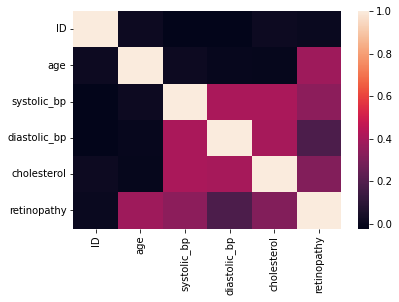

In [25]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

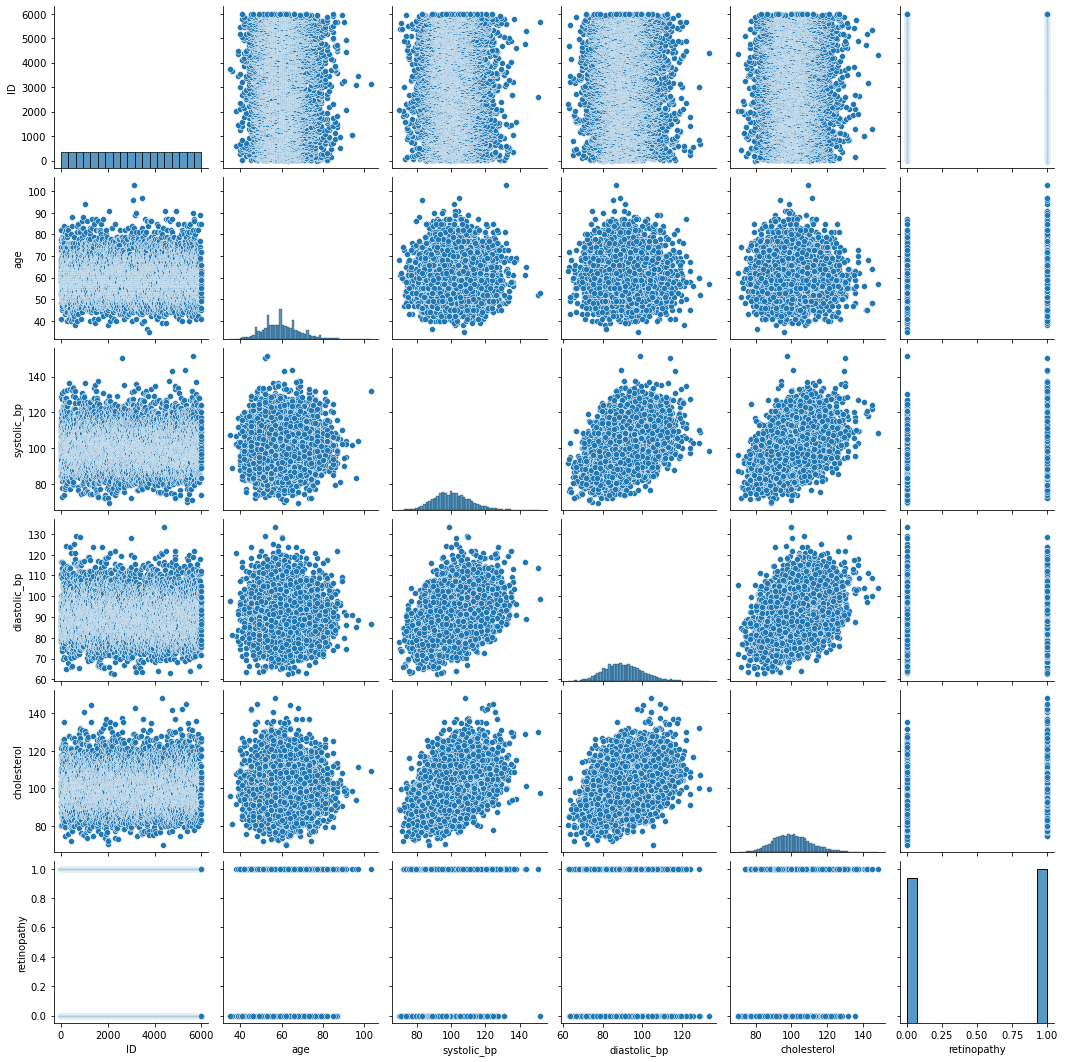

In [26]:
sns.pairplot(df1)

In [27]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='age', ylabel='Density'>

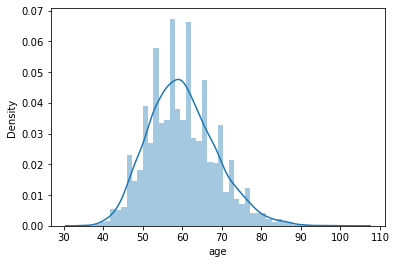

In [28]:
sns.distplot(df1['age'])

<AxesSubplot:xlabel='systolic_bp', ylabel='Density'>

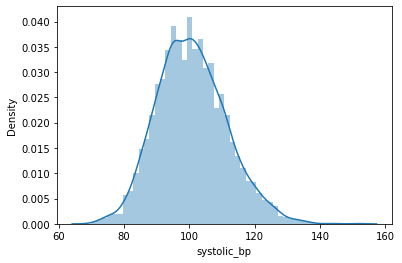

In [29]:
sns.distplot(df1['systolic_bp'])

<AxesSubplot:xlabel='diastolic_bp', ylabel='Density'>

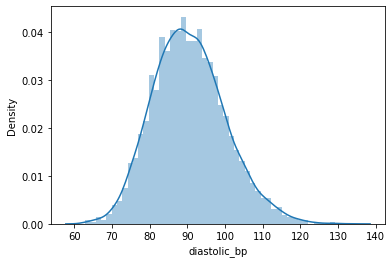

In [30]:
sns.distplot(df1['diastolic_bp'])

<AxesSubplot:xlabel='cholesterol', ylabel='Density'>

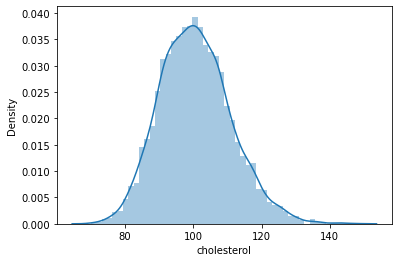

In [31]:
sns.distplot(df1['cholesterol'])

In [32]:
#Finding outliers using boxplot

<AxesSubplot:xlabel='age'>

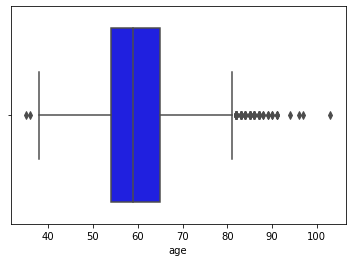

In [33]:
sns.boxplot(df1['age'], color="blue")

<AxesSubplot:xlabel='systolic_bp'>

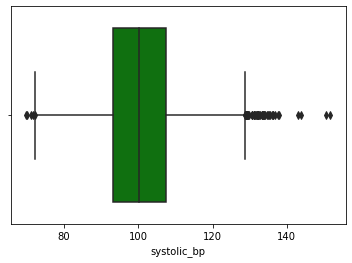

In [34]:
sns.boxplot(df1['systolic_bp'], color="green")

<AxesSubplot:xlabel='diastolic_bp'>

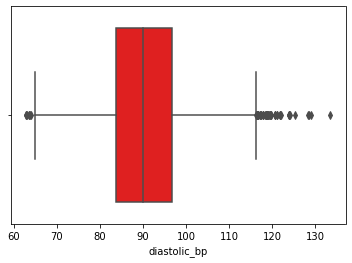

In [35]:
sns.boxplot(df1['diastolic_bp'], color="red")

<AxesSubplot:xlabel='cholesterol'>

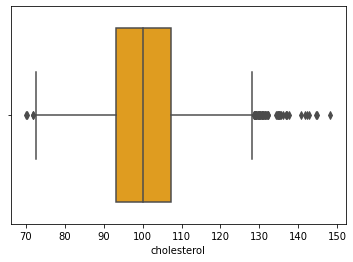

In [36]:
sns.boxplot(df1['cholesterol'], color="orange")